In [1]:
#tensorflow version check
import tensorflow as tf
print(tf.__version__)


ImportError: cannot import name 'pywrap_tensorflow' from 'tensorflow.python' (c:\Users\akank\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\__init__.py)

In [4]:
#everything that used version check
!pip freeze > requirements.txt

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [6]:
df=pd.read_csv(r"D:\6th_sem_project\ASD_dataset.csv")

In [7]:
df1=df.copy()

In [8]:
df1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [9]:
class_counts = df1['Class/ASD Traits '].value_counts()
class_counts

Class/ASD Traits 
Yes    728
No     326
Name: count, dtype: int64

In [10]:
df = df.rename(columns={"Age_Mons":"Age Months",
                        "Family_mem_with_ASD":"Family Member with ASD",
                        "Class/ASD Traits ": "ASD Traits"})
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [11]:
cat_df = df[["Sex", "Ethnicity", "Jaundice", "Who completed the test", "Family Member with ASD", "ASD Traits"]]
num_df = df[["A1", "A2", "A3", "A4","A5","A6", "A7", "A8", "A9", "A10", "Qchat-10-Score", "Age Months"]]

In [12]:
df1.drop("Case_No", axis=1, inplace=True)

In [13]:
df1["Age"] = df1["Age_Mons"] / 12

In [14]:
df1.drop("Age_Mons", axis=1, inplace=True)

In [15]:
df1.drop("Ethnicity",axis=1,inplace=True)

In [16]:
df1.drop("Who completed the test", axis=1, inplace=True)

In [17]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',  'Age',
       'Qchat-10-Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD Traits ']
df1 = df1[order]

In [18]:
le = LabelEncoder()
df1["Sex"] = le.fit_transform(df1["Sex"])
df1["Jaundice"] = le.fit_transform(df1["Jaundice"])
df1["Family_mem_with_ASD"] = le.fit_transform(df1["Family_mem_with_ASD"])
df1["Class/ASD Traits "] = le.fit_transform(df1["Class/ASD Traits "])
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2.333333,3,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,3.000000,4,1,1,0,1
2,1,0,0,0,0,0,1,1,0,1,3.000000,4,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,2.000000,10,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,1.666667,9,0,0,1,1


In [25]:
import numpy as np
import pandas as pd  # If your data is in CSV

# Load your original training data
# REPLACE THIS WITH YOUR ACTUAL DATA LOADING CODE
df2 = df1.copy()

# Extract features (exclude target column)
X_train = df2.drop('Class/ASD Traits ', axis=1).values  

# Randomly sample 150 instances
background = X_train[np.random.choice(X_train.shape[0], 150, replace=False)]

# Save to file
np.save("background_data.npy", background)

In [27]:
background=np.load("background_data.npy")

In [28]:
print(f"Background data shape: {background.shape}")  # Should be (samples, 15)


Background data shape: (150, 15)


In [ ]:
X = df1.drop(columns=["Class/ASD Traits "])
y = df1["Class/ASD Traits "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:

def train_model_with_graphs(model, X_train_scaled, y_train, X_test_scaled, y_test, epochs=100):
    # Initialize lists to store accuracy and loss
    train_accuracies = []
    train_losses = []

    for epoch in range(epochs):
        model.fit(X_train_scaled, y_train)  # Train model on train set

        # Predict probabilities on the training set for loss calculation
        y_train_pred_proba = model.predict_proba(X_train_scaled)

        # Calculate train loss and train accuracy
        train_loss = log_loss(y_train, y_train_pred_proba)
        y_train_pred = model.predict(X_train_scaled)
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Store accuracy and loss
        train_accuracies.append(train_accuracy)
        train_losses.append(train_loss)

    # Plot the graphs after training
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    # Plot Train Loss
    ax[0].plot(range(epochs), train_losses, label='Train Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Training Loss Over Time')
    ax[0].legend()

    # Plot Train Accuracy
    ax[1].plot(range(epochs), train_accuracies, label='Train Accuracy', color='orange')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Training Accuracy Over Time')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3)) 

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))  

model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1), metrics=["accuracy"])


callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=None
)


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_scaled, y_train, batch_size=10, epochs=50, validation_split=0.2, callbacks=callback)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5523 - loss: 0.6880 - val_accuracy: 0.6805 - val_loss: 0.5221
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7127 - loss: 0.5111 - val_accuracy: 0.7515 - val_loss: 0.4618
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7943 - loss: 0.4649 - val_accuracy: 0.8462 - val_loss: 0.4047
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8512 - loss: 0.4351 - val_accuracy: 0.9112 - val_loss: 0.3553
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8898 - loss: 0.3830 - val_accuracy: 0.9586 - val_loss: 0.3189
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9033 - loss: 0.3613 - val_accuracy: 0.9822 - val_loss: 0.2981
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9354 - loss: 0.3319 - val_accuracy: 0.9527 - val_loss: 0.2972
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9134 - loss: 0.3575 - val_accuracy: 0.9822 - val_loss

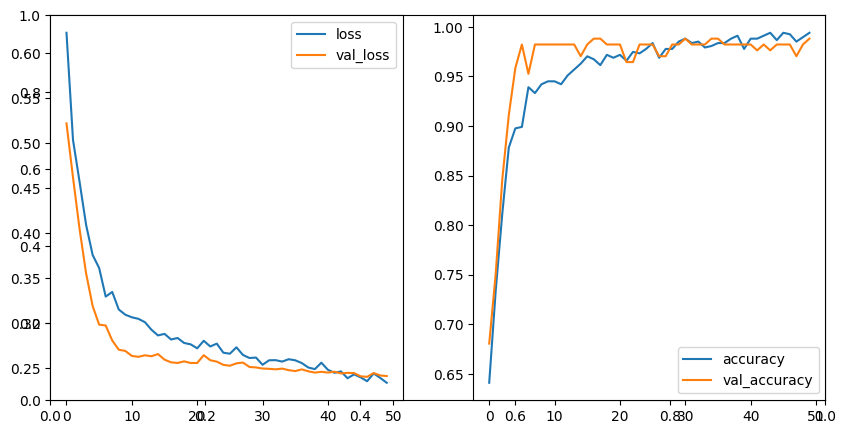

In [ ]:
import matplotlib.pyplot as plt

figure = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [ ]:
y_prob = model.predict(X_test_scaled)
y_pred = np.where(y_prob > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy : {accuracy}\nprecision : {precision}\nrecall : {recall}\nf1 : {f1}\n")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
accuracy : 0.981042654028436
precision : 0.9859154929577465
recall : 0.9859154929577465
f1 : 0.9859154929577465



In [ ]:
x_selected = X_test_scaled[20:120 , :]
y_selected = y_test[20:120]

In [ ]:
y_selected = y_selected.values

In [ ]:
type(x_selected)

numpy.ndarray

In [ ]:
y_pred=model.predict(x_selected)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
np.unique(y_pred)

array([0.00619296, 0.01247288, 0.01279549, 0.01374963, 0.01449652,
       0.01573431, 0.0184742 , 0.02087792, 0.02100282, 0.0227514 ,
       0.02559426, 0.02615767, 0.02898556, 0.03870507, 0.05310718,
       0.06202444, 0.06482629, 0.07447725, 0.09015102, 0.09133346,
       0.0995684 , 0.16079591, 0.20068574, 0.3266496 , 0.3701746 ,
       0.63020414, 0.67136693, 0.7190251 , 0.77699566, 0.783848  ,
       0.8102405 , 0.85839725, 0.8624425 , 0.8694051 , 0.8794273 ,
       0.8806669 , 0.8922399 , 0.8964288 , 0.90499276, 0.9054588 ,
       0.90640855, 0.90683794, 0.9126098 , 0.91289485, 0.91332203,
       0.9137561 , 0.91540956, 0.91616565, 0.923205  , 0.9250417 ,
       0.9252197 , 0.92570174, 0.92767084, 0.92947525, 0.9315938 ,
       0.93210423, 0.9331193 , 0.9332561 , 0.93444675, 0.93446714,
       0.9353113 , 0.9356223 , 0.9357464 , 0.93670696, 0.9368865 ,
       0.9381119 , 0.9385745 , 0.93906486, 0.93906504, 0.94029754,
       0.9410462 , 0.942495  , 0.94293034, 0.9438923 , 0.94498

In [ ]:
np.unique(y_selected)

array([0, 1])

In [ ]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

In [ ]:
np.unique(y_pred_binary)

array([0, 1])

In [ ]:
accuracy = accuracy_score(y_selected, y_pred_binary)
precision = precision_score(y_selected, y_pred_binary)
recall = recall_score(y_selected, y_pred_binary)
f1 = f1_score(y_selected, y_pred_binary)

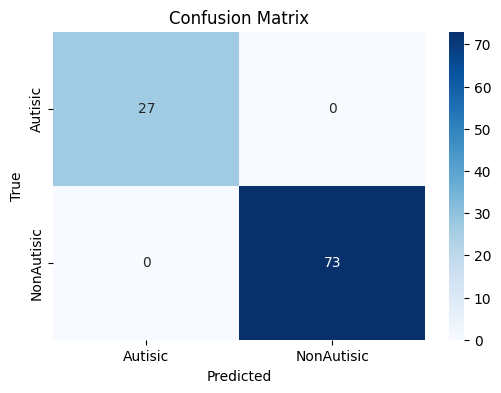

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_selected, y_pred_binary)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Autisic', 'NonAutisic'], yticklabels=['Autisic', 'NonAutisic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("my_model7.keras")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Loaded model accuracy : 0.981042654028436
Loaded model precision : 0.9859154929577465
Loaded model recall : 0.9859154929577465
Loaded model F1 score : 0.9859154929577465


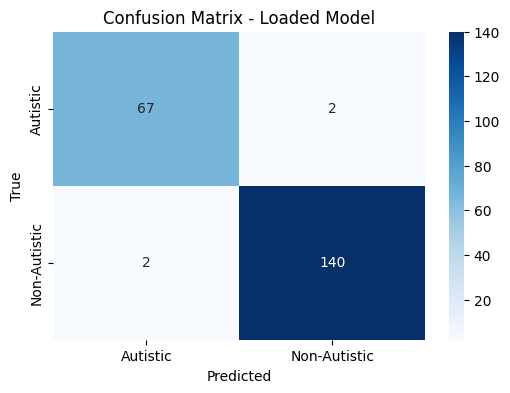

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
loaded_model = load_model('my_model7.keras')

# Predict on the test set
y_prob_loaded = loaded_model.predict(X_test_scaled)
y_pred_loaded = np.where(y_prob_loaded > 0.5, 1, 0)

# Evaluate performance
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
precision_loaded = precision_score(y_test, y_pred_loaded)
recall_loaded = recall_score(y_test, y_pred_loaded)
f1_loaded = f1_score(y_test, y_pred_loaded)

print(f"Loaded model accuracy : {accuracy_loaded}")
print(f"Loaded model precision : {precision_loaded}")
print(f"Loaded model recall : {recall_loaded}")
print(f"Loaded model F1 score : {f1_loaded}")

# Plot confusion matrix for the loaded model
cm_loaded = confusion_matrix(y_test, y_pred_loaded)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_loaded, annot=True, fmt='d', cmap='Blues', xticklabels=['Autistic', 'Non-Autistic'], yticklabels=['Autistic', 'Non-Autistic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Loaded Model')
plt.show()


In [ ]:
len(df1.columns)

16

In [33]:
new_input=[[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3,0,0,0]]
input_data=np.array(new_input).reshape(1, -1)

In [ ]:
raw_predictions = model.predict(input_data)
print(raw_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.70206654]]


In [34]:
input_data.shape

(1, 15)